# ビジネスに活かすデータマイニング

## 2.4.4 Rでデータを操作する

In [4]:
x <- read.table("data/ch3_2_2.txt", header = TRUE, sep = " ")
x


,DB1,DB2
1,0.9477293,2.465692
2,1.404682,2.132022
3,1.406439,2.599804
4,1.839667,2.366184
5,1.326534,1.804903
6,2.31149,2.449027
7,1.317801,3.106597
8,2.012065,2.105955
9,0.7177466,1.629425
10,1.997013,1.954929


### 1. データ形式を変える

- `as.xxx()`という書式で、vectorやlist形式に変換できる

In [8]:
x1 <- as.vector(x)
x1
x1$DB1

,DB1,DB2
1,0.9477293,2.465692
2,1.404682,2.132022
3,1.406439,2.599804
4,1.839667,2.366184
5,1.326534,1.804903
6,2.31149,2.449027
7,1.317801,3.106597
8,2.012065,2.105955
9,0.7177466,1.629425
10,1.997013,1.954929


[1] 0.9477293 1.4046824 1.4064391 1.8396669 1.3265343 2.3114898 1.3178015
 [8] 2.0120652 0.7177466 1.9970131 1.8620700 1.0178107 2.9497059 1.7246067
[15] 0.7908451

x2 <- as.list(x)
x2
x2$DB1

### 2. データ型を変える

In [10]:
x1 <- as.factor(x)
x2 <- as.numeric(x)
x1
x2

ERROR: Error in sort.list(y): 'x' must be atomic for 'sort.list'
Have you called 'sort' on a list?


ERROR: Error in eval(expr, envir, enclos): (list) object cannot be coerced to type 'double'


,DB1,DB2
1,0.9477293,2.465692
2,1.404682,2.132022
3,1.406439,2.599804
4,1.839667,2.366184
5,1.326534,1.804903
6,2.31149,2.449027
7,1.317801,3.106597
8,2.012065,2.105955
9,0.7177466,1.629425
10,1.997013,1.954929


$DB1
 [1] 0.9477293 1.4046824 1.4064391 1.8396669 1.3265343 2.3114898 1.3178015
 [8] 2.0120652 0.7177466 1.9970131 1.8620700 1.0178107 2.9497059 1.7246067
[15] 0.7908451

$DB2
 [1] 2.465692 2.132022 2.599804 2.366184 1.804903 2.449027 3.106597 2.105955
 [9] 1.629425 1.954929 2.464656 1.983886 2.406778 2.498565 2.452570

### 3. データ行列を操作する

In [11]:
y[2,2]

ERROR: Error in eval(expr, envir, enclos): object 'y' not found


## 3. 仮説検定

### 3.2.1 t検定: 睡眠薬の効果を「どれくらい睡眠時間を延ばしたか」で比べる

In [12]:
t.test(extra ~ group, data = sleep, paired = T)


	Paired t-test

data:  extra by group
t = -4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.4598858 -0.7001142
sample estimates:
mean of the differences 
                  -1.58 


### 3.2.2 t検定: データベース基盤システムのパフォーマンスを比べる

- 箱ひげ図で可視化する
- t検定で、t < 0 かつ p < 0.05なので、**有意に**DB1がDB2よりもレイテンシが小さい、と結論づけられる
- 箱ひげ図からある程度は予想できる（箱同士が重なるか、重ならないか）

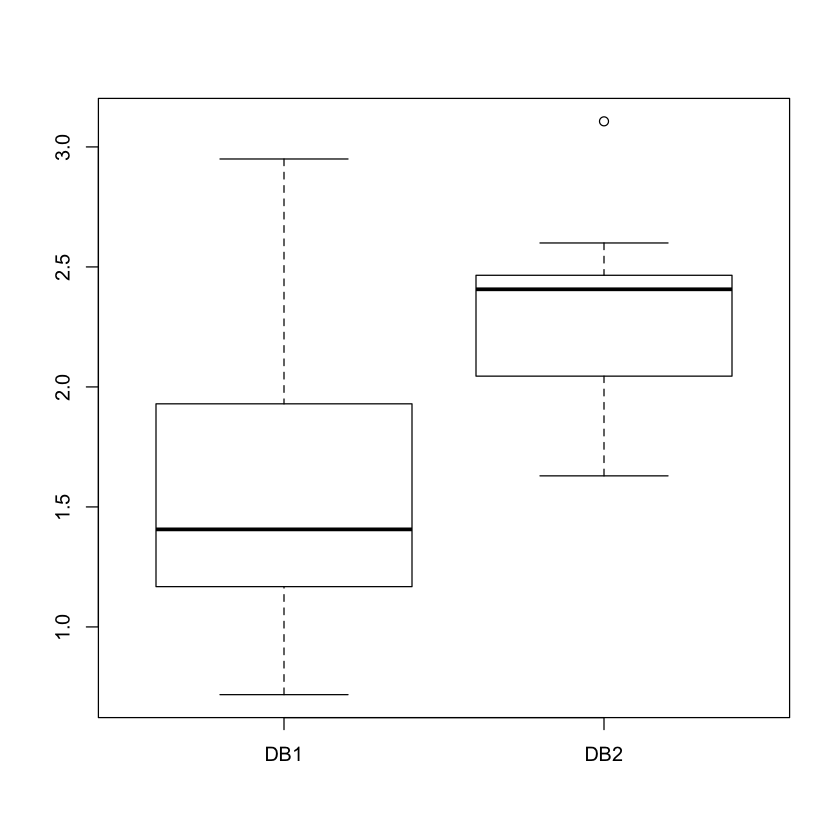

In [13]:
d <- read.table("data/ch3_2_2.txt", header = TRUE, sep = " ")
boxplot(d)

In [15]:
attach(d)
t.test(DB1, DB2)

The following objects are masked from d (pos = 3):

    DB1, DB2




	Welch Two Sample t-test

data:  DB1 and DB2
t = -3.9165, df = 22.914, p-value = 0.0006957
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0998402 -0.3394647
sample estimates:
mean of x mean of y 
 1.575080  2.294733 


### 3.3 独立性の検定（カイ二乗検定）: 施策の効果があったかどうかを見る

- A/Bどちらが大きいかを知るにはt検定
- **分母の大きさに由来するばらつきを扱うケース**は独立性の決定を使って判定できる
    - カイ二乗検定 `chisq.test`
    - フィッシャーの正確確率検定 `fisher.test`
    - 伝統的には2x2分割表を扱う
        - 下記の様な施策（行） × 結果（列）
        
#### 3.3.1 予防接種は効果があったか
    
||病気にかからなかった|病気にかかった|
|---|---|---|
|予防接種あり|1625|5|
|予防接種なし|1022|11|



In [17]:
x <- matrix(c(1625,5,1022,11), ncol = 2) # ncolは列数
x
chisq.test(x)
fisher.test(x)

1625,1022
5,11



	Pearson's Chi-squared test with Yates' continuity correction

data:  x
X-squared = 4.8817, df = 1, p-value = 0.02714



	Fisher's Exact Test for Count Data

data:  x
p-value = 0.01885
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  1.115982 12.879160
sample estimates:
odds ratio 
  3.496373 


> 注意: 極端にサンプルサイズが違うケースではchisq.testは使えない。fisher.testを使うこと

In [18]:
x <- matrix(c(1625,5,5,1), ncol = 2) # 片方が1桁しかないケース
chisq.test(x)
fisher.test(x)

Warning message:
In chisq.test(x): Chi-squared approximation may be incorrect


	Pearson's Chi-squared test with Yates' continuity correction

data:  x
X-squared = 10.46, df = 1, p-value = 0.00122



	Fisher's Exact Test for Count Data

data:  x
p-value = 0.02184
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
   1.14725 773.04245
sample estimates:
odds ratio 
  63.18993 


#### 3.3.2 A／Bテスト

サイト導線A/Bで効果に違いはあったか

||コンバージョンした|コンバージョンしなかった|
|---|---|---|
|サイト導線A|25|117|
|サイト導線B|10|32|


In [19]:
ab1 <- matrix(c(25,117,10,32), ncol = 2, byrow = T)
ab1
chisq.test(ab1)

25,117
10,32



	Pearson's Chi-squared test with Yates' continuity correction

data:  ab1
X-squared = 0.45721, df = 1, p-value = 0.4989


> **p = 0.5近いため**、統計的には効果があるとは言えない。

In [21]:
# 導線Bでのコンバージョンを6人増やす
ab2 <- matrix(c(25,117,16,32), ncol = 2, byrow = T)
ab2
chisq.test(ab2)

25,117
16,32



	Pearson's Chi-squared test with Yates' continuity correction

data:  ab2
X-squared = 4.3556, df = 1, p-value = 0.03689


> **p < 0.05となり**、導線Bは有意に効果があり。十分なデータを蓄積することで有意差ありと結論づけられた。

## 3.4 順位和検定: 分布同士のずれを見る（ノンパラメトリック検定のひとつ）

- データがどの様に分布していてもお構いなしに使える仮説検定メソッド。**外れ値が多い**場合等に有効。
- t検定が使えない場面で伝統的に使われてきた
     - データのばらつきの分布が完全に不明
     - ２つのデータを比べたいのにお互いのばらつき分布が似ていない
     - 等
- ただし、t検定が使える場面では、t検定を使うべき

### 3.4.1 売上データで試す

In [24]:
r <- read.table("data/ch3_4_1.txt", header = TRUE, sep = " ")
r
attach(r)
wilcox.test(A, B)
t.test(A, B)

,A,B
1,146,157
2,162,117
3,152,116
4,149,137
5,157,123
6,132,143
7,154,122
8,156,133
9,150,113
10,143,129


The following objects are masked from r (pos = 3):

    A, B

Warning message:
In wilcox.test.default(A, B): cannot compute exact p-value with ties


	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 841.5, p-value = 7.204e-09
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  A and B
t = 9.1439, df = 54.398, p-value = 1.377e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 18.37431 28.69236
sample estimates:
mean of x mean of y 
 153.7333  130.2000 


> 外れ値を加えるとどうなるか。t検定はうまくいかないはず。

In [25]:
r2 <- r
r2[1,1] <- 50
r2[1,2] <- 400
attach(r2)
wilcox.test(A, B)
t.test(A, B)

The following objects are masked from r (pos = 3):

    A, B

The following objects are masked from r (pos = 4):

    A, B

Warning message:
In wilcox.test.default(A, B): cannot compute exact p-value with ties


	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 805, p-value = 1.566e-07
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  A and B
t = 1.2286, df = 38.583, p-value = 0.2267
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.914541 32.381208
sample estimates:
mean of x mean of y 
 150.5333  138.3000 


## 4. 重回帰分析

### 4.3 オゾン濃度と気象データの関連性を調べる

In [26]:
data(airquality) # ニューヨークの1973年5-9月 オゾン濃度と各種気象データ
head(airquality)

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41,190,7.4,67,5,1
2,36,118,8,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


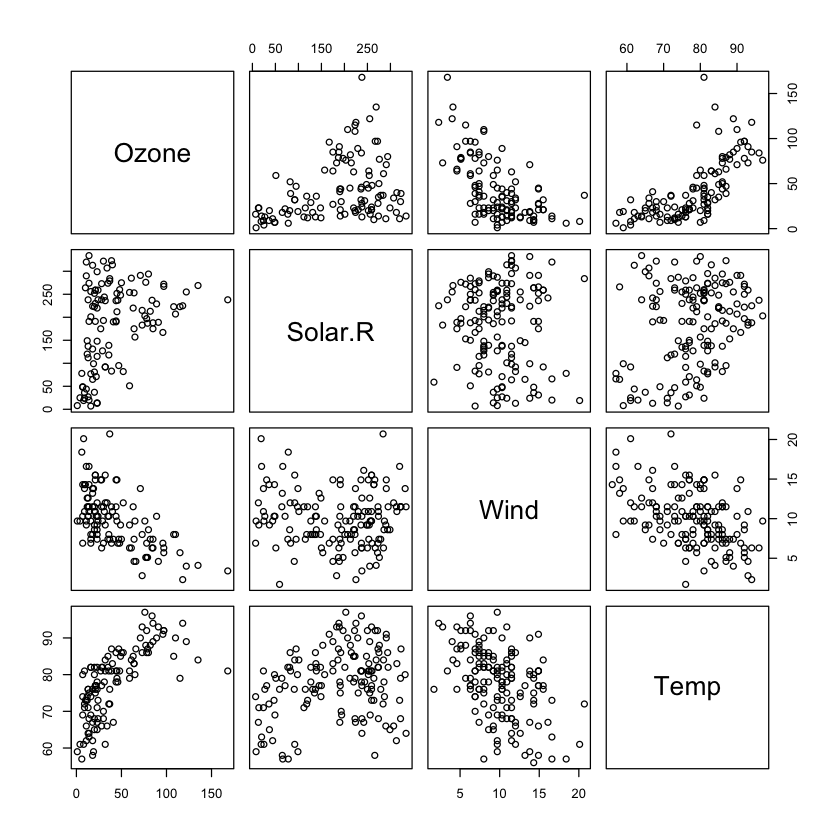

In [28]:
airq <- airquality[,1:4] # 1-4列目のみ抽出
plot(airq)

In [29]:
airq.lm <- lm(Ozone ~ ., airq) # Ozoneを目的変数として重回帰
summary(airq.lm)


Call:
lm(formula = Ozone ~ ., data = airq)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.485 -14.219  -3.551  10.097  95.619 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -64.34208   23.05472  -2.791  0.00623 ** 
Solar.R       0.05982    0.02319   2.580  0.01124 *  
Wind         -3.33359    0.65441  -5.094 1.52e-06 ***
Temp          1.65209    0.25353   6.516 2.42e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.18 on 107 degrees of freedom
  (42 observations deleted due to missingness)
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.5948 
F-statistic: 54.83 on 3 and 107 DF,  p-value: < 2.2e-16


> R squared = 0.6 近い

**偏回帰係数と相関係数の違い**に注意すること  ←あとで読み返す★

# 5. クラスタリング

## 5.3 ECサイトの顧客データでクラスタリング

### 5.3.1 階層的クラスタリング

In [30]:
d <- read.table("data/ch5_3.txt", header = TRUE, sep = " ")
head(d)

,books,cloths,cosmetics,foods,liquors
1,43,0,3,4,10
2,25,5,5,3,11
3,19,0,2,3,8
4,31,3,3,4,5
5,46,9,2,5,7
6,28,3,7,4,0


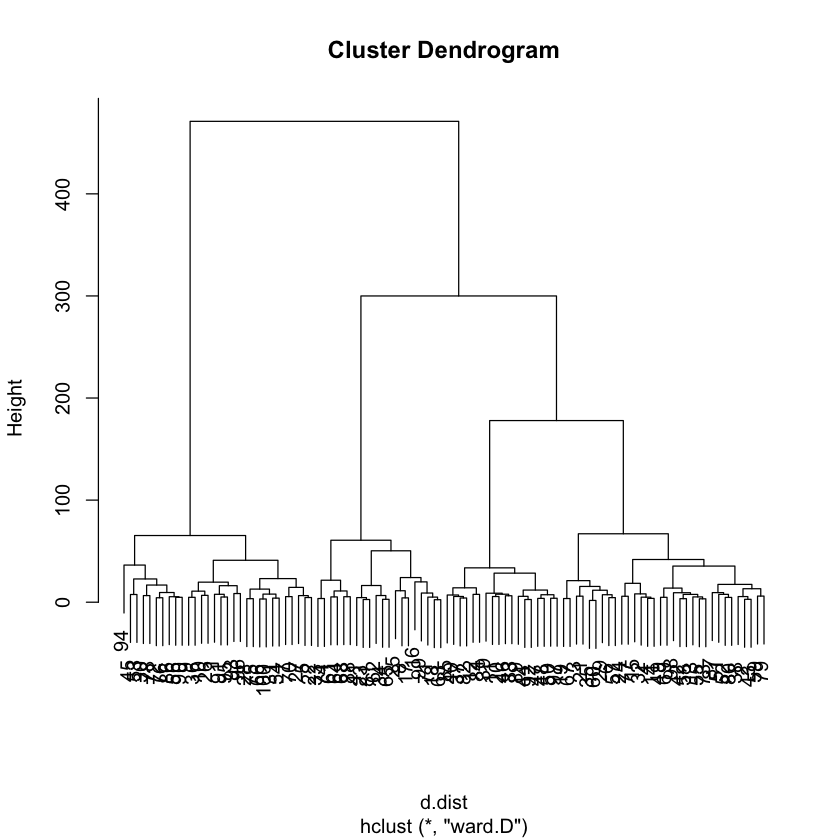

In [31]:
d.dist <- dist(d) # 全データ点同士の距離を算出
d.hcl <- hclust(d.dist, "ward.D") # Ward法で階層的クラスタリングを実施
plot(d.hcl)

In [32]:
ClusterWard <- cutree(d.hcl, 3)
ClusterWard

[1] 1 2 2 2 1 2 1 3 1 1 2 2 2 2 2 3 3 3 2 2 2 1 3 2 3 1 1 1 2 1 1 2 3 3 2 1 2
 [38] 2 2 2 3 2 2 2 1 2 2 2 2 2 2 2 1 1 2 1 2 2 2 2 3 3 3 3 3 1 2 3 2 1 3 1 2 3
 [75] 1 1 2 1 2 2 3 2 2 2 2 1 2 3 2 1 1 2 1 1 1 1 2 2 3 1

### 5.3.2 k-means法

In [34]:
d.km <- kmeans(d, 3)
d.km
ClusterKmeans <- d.km$cluster

K-means clustering with 3 clusters of sizes 21, 46, 33

Cluster means:
      books   cloths cosmetics    foods  liquors
1  9.047619 13.57143  5.285714 4.333333 7.571429
2 28.739130 10.28261  4.478261 5.043478 6.043478
3 46.060606 11.36364  4.575758 5.090909 5.242424

Clustering vector:
  [1] 3 2 2 2 3 2 3 1 3 3 2 2 2 2 2 1 1 1 1 2 2 3 1 2 1 3 3 2 2 3 3 2 1 1 2 3 3
 [38] 2 2 3 1 2 2 2 3 2 2 2 2 2 2 2 3 3 2 3 2 2 2 2 1 2 1 1 1 3 1 1 2 3 1 3 2 1
 [75] 3 3 2 3 2 2 1 3 2 3 3 3 2 1 2 3 3 2 3 3 3 2 2 2 1 3

Within cluster sum of squares by cluster:
[1] 2406.190 4727.500 3614.364
 (between_SS / total_SS =  62.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

### 5.3.3 EMアルゴリズム

In [37]:
library("mclust")

Package 'mclust' version 5.1
Type 'citation("mclust")' for citing this R package in publications.


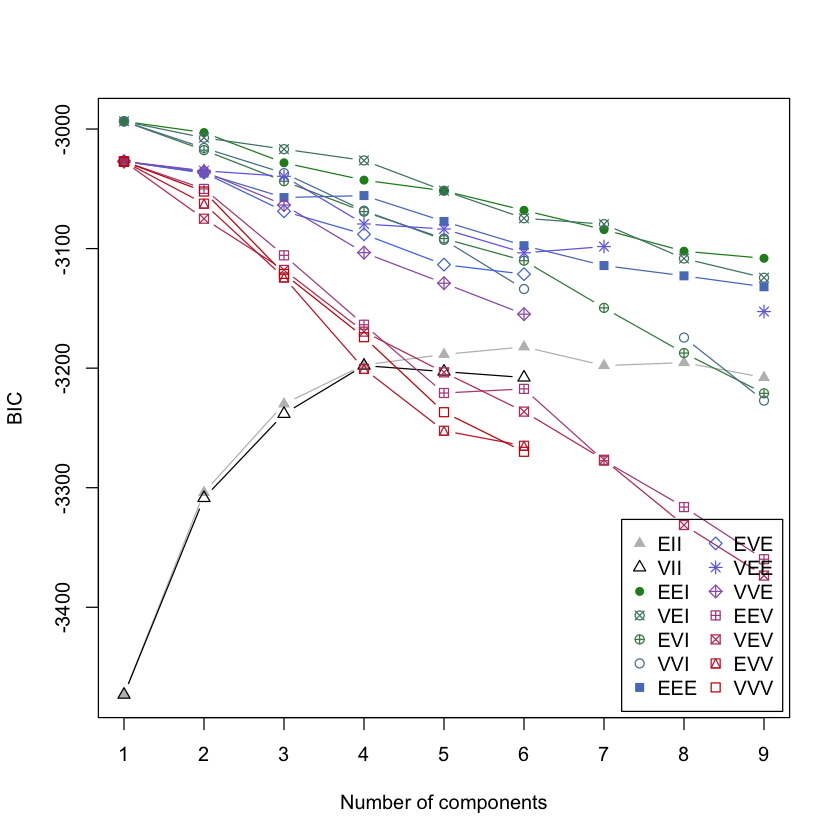

In [38]:
plot(mclustBIC(d)) # 10のクラスタリングアルゴリズムで、クラスター数がいくつなら最も数理的に妥当な結果となるかを算出

In [39]:
d.mc <- hc(modelName = "EEE", data = d)
d.mcl <- hclass(d.mc, 3)
head(d.mcl)
ClusterEM <- as.numeric(d.mcl)

3
1
1
1
1
1
2


### 5.3.4 3つの手法を比較する

In [44]:
d2 <- cbind(d, ClusterWard, ClusterKmeans, ClusterEM)
Ward.res <- with(d2, aggregate(d2[,1:5], list(ClusterWard = ClusterWard), mean))
Kmeans.res <- with(d2, aggregate(d2[,1:5], list(ClusterKmeans = ClusterKmeans), mean))
EM.res <- with(d2, aggregate(d2[,1:5], list(ClusterEM = ClusterEM), mean))

# 各手法、各クラスターの平均値を比較。どうもEMだけ異なるようだ
round(Ward.res[order(Ward.res$books),-1],1)
round(Kmeans.res[order(Kmeans.res$books),-1],1)
round(EM.res[order(EM.res$books),-1],1)

,books,cloths,cosmetics,foods,liquors
3,9.2,14.4,5.3,4.2,8.4
2,29,11.1,4.5,5.3,6.1
1,46.6,9.7,4.6,4.8,4.6


,books,cloths,cosmetics,foods,liquors
1,9,13.6,5.3,4.3,7.6
2,28.7,10.3,4.5,5,6
3,46.1,11.4,4.6,5.1,5.2


,books,cloths,cosmetics,foods,liquors
3,5.7,22.3,3,6,0.7
2,24.9,13.4,5,5.7,6
1,39.2,7.8,4.4,3.8,6.6


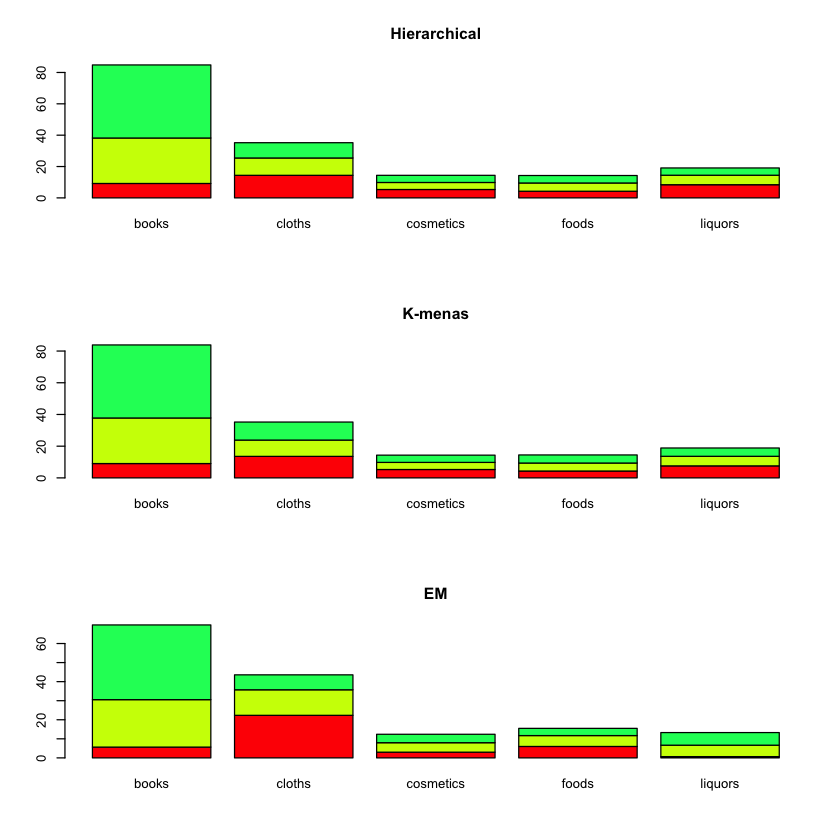

In [45]:
par(mfrow = c(3,1))
barplot(as.matrix(Ward.res[order(Ward.res$books),-1]), col = rainbow(5), main = "Hierarchical")
barplot(as.matrix(Kmeans.res[order(Kmeans.res$books),-1]), col = rainbow(5), main = "K-menas")
barplot(as.matrix(EM.res[order(EM.res$books),-1]), col = rainbow(5), main = "EM")

# 6. ロジスティック回帰

- ★保留

# 7. 決定木

> 試そうとしたが{mvpart}が使えない模様


```
> install.packages("mvpart")
--- Please select a CRAN mirror for use in this session ---
Warning message:
package ‘mvpart’ is not available (for R version 3.2.2)
```

# 8. SVM/ Random Forest

### 8.4.1 SVM

In [47]:
library(e1071)
d.train <- read.table("data/ch8_train.txt", header = TRUE, sep = " ")
head(d.train)
d.test <- read.table("data/ch8_test.txt", header = TRUE, sep = " ")
head(d.test)

,age,sex,act1,act2,influx,label
1,28,M,Yes,Yes,C,No
2,34,M,Yes,Yes,A,Yes
3,33,M,No,Yes,A,No
4,40,M,No,No,A,Yes
5,30,F,Yes,Yes,A,No
6,31,M,No,Yes,C,No


,age,sex,act1,act2,influx
1,31,F,No,Yes,B
2,32,F,No,Yes,C
3,33,F,Yes,No,C
4,34,M,No,Yes,A
5,36,F,No,Yes,C
6,27,M,Yes,No,B


In [48]:
d.svm <- svm(label ~ ., d.train)
print(d.svm)


Call:
svm(formula = label ~ ., data = d.train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1428571 

Number of Support Vectors:  1502



In [49]:
d.test.svm.pred <- predict(d.svm, newdata = d.test)
summary(d.test.svm.pred)

No Yes 
471  29

In [50]:
res <- tune.svm(label ~ ., data = d.train) # tune.svmでパラメータチューニングができる
res$best.model


Call:
best.svm(x = label ~ ., data = d.train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1428571 

Number of Support Vectors:  1502


### 8.4.2 Random Forest

In [51]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [52]:
d.rf <- randomForest(label ~ ., d.train)
print(d.rf)


Call:
 randomForest(formula = label ~ ., data = d.train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 6.2%
Confusion matrix:
      No Yes class.error
No  8821 179  0.01988889
Yes  441 559  0.44100000


In [53]:
d.test.rf.pred <- predict(d.rf, newdata = d.test)
summary(d.test.rf.pred)

No Yes 
472  28

mtry = 2  OOB error = 6.32% 
Searching left ...
mtry = 1 	OOB error = 7.8% 
-0.2341772 0.05 
Searching right ...
mtry = 4 	OOB error = 6.51% 
-0.03006329 0.05 



Call:
 randomForest(x = x, y = y, mtry = res[which.min(res[, 2]), 1]) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 6.28%
Confusion matrix:
      No Yes class.error
No  8821 179  0.01988889
Yes  449 551  0.44900000

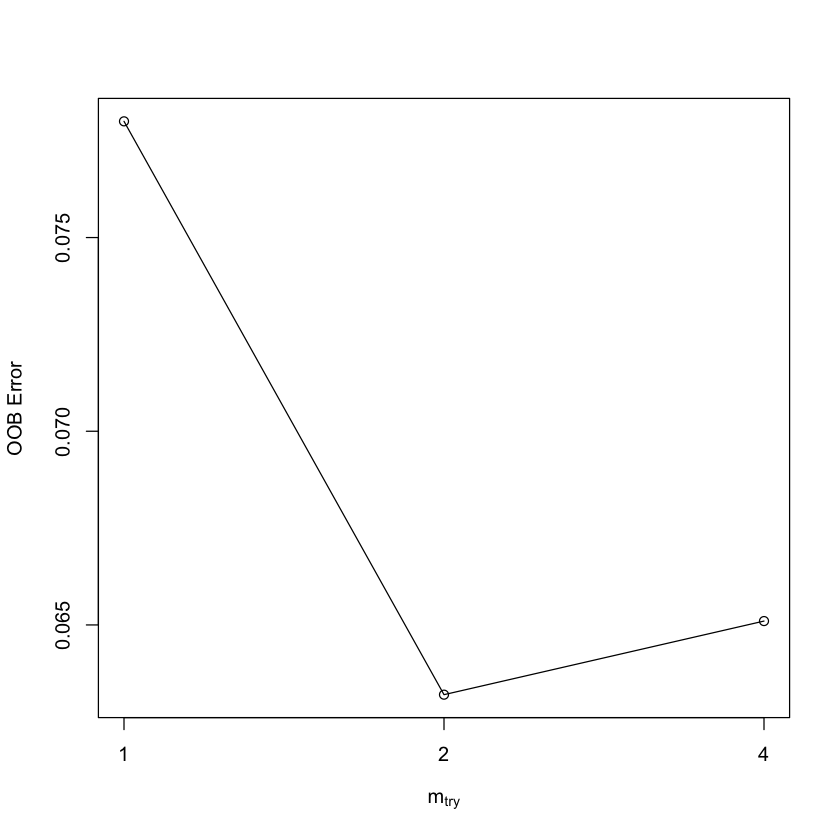

In [55]:
tuneRF(d.train[,-6], d.train[,6], doBest = T) # パラメータチューニング

In [57]:
importance(d.rf) # それぞれの説明変数の重要度を算出できる（回帰でなく分類器なのに）

,MeanDecreaseGini
age,139.7685
sex,43.24062
act1,435.4206
act2,103.5352
influx,108.1218


### 8.4.3 答え合わせ

In [61]:
table(d.test.label$label, d.test.svm.pred)
table(d.test.label$label, d.test.rf.pred)  # エラー確認要★

ERROR: Error in table(d.test.label$label, d.test.svm.pred): object 'd.test.label' not found


ERROR: Error in table(d.test.label$label, d.test.rf.pred): object 'd.test.label' not found


# 9. アソシエーション分析

- ★保留


# 10. その他の分析手法

- ★保留